.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

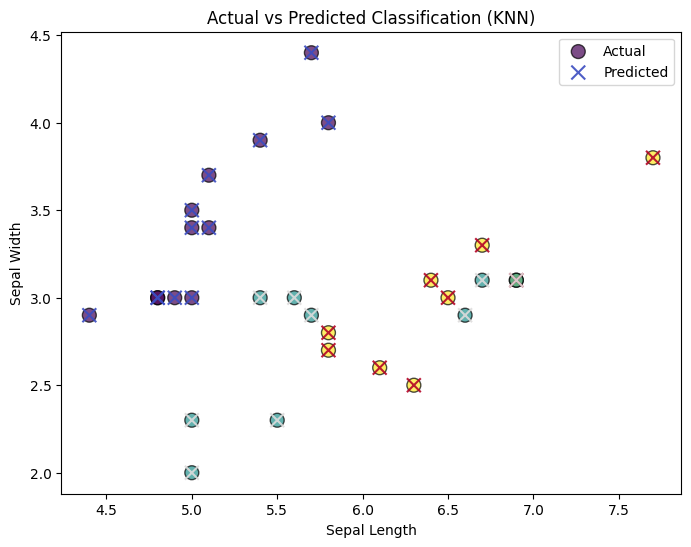

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import datasets
import matplotlib.pyplot as plt
iris=datasets.load_iris()
print(iris.DESCR)

X=iris.data
y=iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X.shape)
print(X_train.shape)
print(X_test.shape)

classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

y_pred=classifier.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


plt.figure(figsize=(8, 6))


plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', marker='o', edgecolors='black', s=100, alpha=0.7, label='Actual')


plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm', marker='x', s=100, alpha=0.9, label='Predicted')

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.title("Actual vs Predicted Classification (KNN)")

plt.show()

# Graded Lab Task1
Classifying digits from (0-9)

(1797, 64)
(1437, 64)
(360, 64)
[[38  0  0  0  0  0  0  0  0  0]
 [ 0 32  0  0  0  0  0  0  0  0]
 [ 0  0 41  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  0  0  0  0  0]
 [ 0  1  0  0 36  0  0  0  0  0]
 [ 0  0  0  0  0 38  0  0  0  0]
 [ 0  1  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  0  0 38  0  0]
 [ 0  3  0  0  0  0  0  0 30  0]
 [ 0  0  0  0  0  1  0  0  0 34]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       0.86      1.00      0.93        32
           2       1.00      1.00      1.00        41
           3       1.00      1.00      1.00        33
           4       1.00      0.97      0.99        37
           5       0.97      1.00      0.99        38
           6       1.00      0.97      0.99        35
           7       1.00      1.00      1.00        38
           8       1.00      0.91      0.95        33
           9       1.00      0.97      0.99        35

    accuracy                           0.

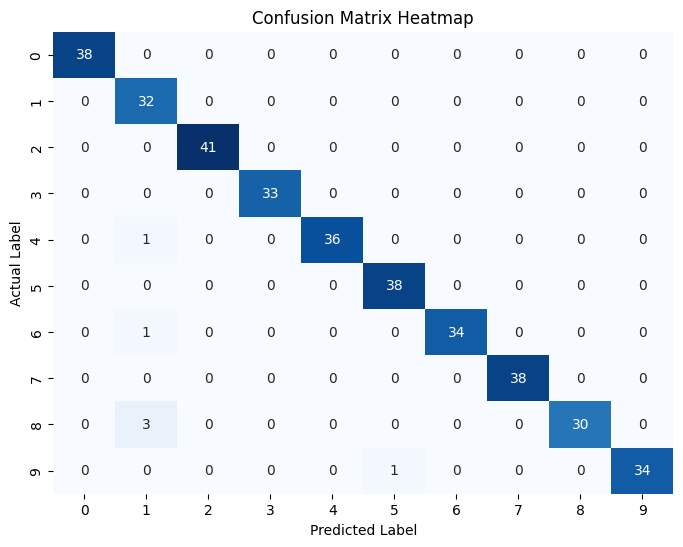

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

loadDigits=load_digits()

X=loadDigits.data
y=loadDigits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print(X.shape)
print(X_train.shape)
print(X_test.shape)

k_values=[1, 3, 5, 7, 9]
for k in k_values:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train)

y_pred=classifier.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:", classifier.score(X_test, y_test))

plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix Heatmap")
plt.show()






# Lab task2
KNN to predict the Age of sea slugs

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from google.colab import files
import zipfile

uploaded = files.upload()



zip_path = "abalone.zip"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("abalone_dataset")


data_path = "abalone_dataset/abalone.data"

df = pd.read_csv(data_path, header=None)


print(df.head())

Saving abalone.zip to abalone (2).zip
   0      1      2      3       4       5       6      7   8
0  M  0.455  0.365  0.095  0.5140  0.2245  0.1010  0.150  15
1  M  0.350  0.265  0.090  0.2255  0.0995  0.0485  0.070   7
2  F  0.530  0.420  0.135  0.6770  0.2565  0.1415  0.210   9
3  M  0.440  0.365  0.125  0.5160  0.2155  0.1140  0.155  10
4  I  0.330  0.255  0.080  0.2050  0.0895  0.0395  0.055   7


In [ ]:
df.columns = ["Sex", "Length", "Diameter", "Height", "WholeWeight", "ShuckedWeight",
              "VisceraWeight", "ShellWeight", "Rings"]

print(df.head())

  Sex  Length  Diameter  Height  WholeWeight  ShuckedWeight  VisceraWeight  \
0   M   0.455     0.365   0.095       0.5140         0.2245         0.1010   
1   M   0.350     0.265   0.090       0.2255         0.0995         0.0485   
2   F   0.530     0.420   0.135       0.6770         0.2565         0.1415   
3   M   0.440     0.365   0.125       0.5160         0.2155         0.1140   
4   I   0.330     0.255   0.080       0.2050         0.0895         0.0395   

   ShellWeight  Rings  
0        0.150     15  
1        0.070      7  
2        0.210      9  
3        0.155     10  
4        0.055      7  



🔹 K = 1
Mean Absolute Error (MAE): 1.930622009569378
Mean Squared Error (MSE): 7.62200956937799
R-squared (R²): 0.2959019236300269

🔹 K = 3
Mean Absolute Error (MAE): 1.661084529505582
Mean Squared Error (MSE): 5.625465178096757
R-squared (R²): 0.4803366258555576

🔹 K = 5
Mean Absolute Error (MAE): 1.5559808612440191
Mean Squared Error (MSE): 5.131483253588517
R-squared (R²): 0.5259691745478539

🔹 K = 7
Mean Absolute Error (MAE): 1.505639097744361
Mean Squared Error (MSE): 4.884947759007909
R-squared (R²): 0.5487433741747498

🔹 K = 9
Mean Absolute Error (MAE): 1.5228601807549178
Mean Squared Error (MSE): 4.932394116604644
R-squared (R²): 0.5443604238765979


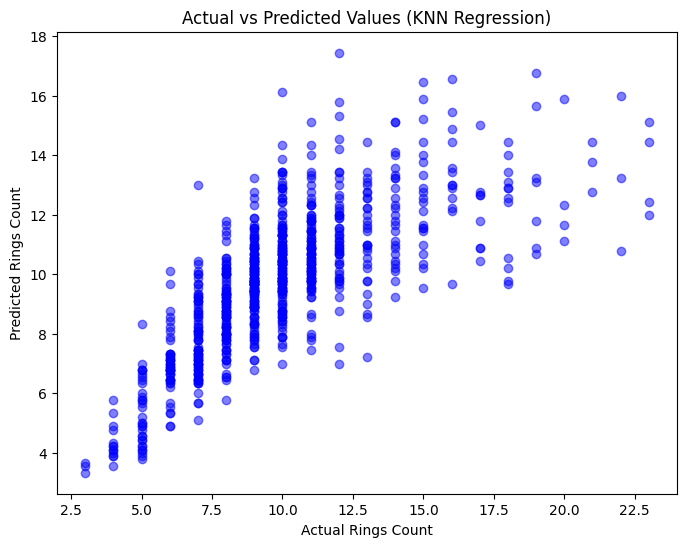

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
label_encoder = LabelEncoder()
df["Sex"] = label_encoder.fit_transform(df["Sex"])  # M → 2, F → 0, I → 1

X = df.drop(columns=["Rings"])
y = df["Rings"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k_values = [1, 3, 5, 7, 9]
for k in k_values:
    regressor = KNeighborsRegressor(n_neighbors=k)
    regressor.fit(X_train, y_train)

    y_pred = regressor.predict(X_test)


    print(f"\n🔹 K = {k}")
    print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
    print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
    print("R-squared (R²):", r2_score(y_test, y_pred))

# Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.xlabel("Actual Rings Count")
plt.ylabel("Predicted Rings Count")
plt.title("Actual vs Predicted Values (KNN Regression)")
plt.show()
